## (2) Modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scs
import seaborn as sns
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import maxabs_scale

In [2]:
df = pd.read_csv("bam_data.csv")
df.head()

,Unnamed: 0,bamid,approach_vertical,vertical_jump,3/4_court_sprint,4-way_agility,reaction_shuttle,bamscore,wingspan,reach,height,weight,body_comp,hand_length,hand_width
0,0,1037.0,33.5,28.5,3.376,11.471,3.669,2003.0,72.75,94.0,70.0,174.4,9.8,7.50,8.25
1,1,656.0,30.5,21.5,3.486,12.114,3.355,1865.0,82.00,104.5,79.5,188.4,21.9,7.50,8.75
2,2,477.0,37.0,31.0,3.230,12.036,3.562,2005.0,81.50,99.0,74.0,196.5,13.9,9.00,9.50
3,3,1200.0,29.0,23.0,3.370,12.509,3.173,1902.0,79.50,101.0,77.5,205.0,10.6,8.25,9.25
4,4,1501.0,31.0,26.0,3.389,12.724,3.316,1903.0,77.00,101.5,78.0,180.0,15.4,8.00,10.00


In [3]:
df.columns = [column.strip().lower().replace(" ", "_") for column in df.columns]
df.head()

,unnamed:_0,bamid,approach_vertical,vertical_jump,3/4_court_sprint,4-way_agility,reaction_shuttle,bamscore,wingspan,reach,height,weight,body_comp,hand_length,hand_width
0,0,1037.0,33.5,28.5,3.376,11.471,3.669,2003.0,72.75,94.0,70.0,174.4,9.8,7.50,8.25
1,1,656.0,30.5,21.5,3.486,12.114,3.355,1865.0,82.00,104.5,79.5,188.4,21.9,7.50,8.75
2,2,477.0,37.0,31.0,3.230,12.036,3.562,2005.0,81.50,99.0,74.0,196.5,13.9,9.00,9.50
3,3,1200.0,29.0,23.0,3.370,12.509,3.173,1902.0,79.50,101.0,77.5,205.0,10.6,8.25,9.25
4,4,1501.0,31.0,26.0,3.389,12.724,3.316,1903.0,77.00,101.5,78.0,180.0,15.4,8.00,10.00


In [4]:
df_clean = df.drop(columns=['unnamed:_0','bamid'])

In [5]:
df_clean.describe()
# still have 0's in two columns

,approach_vertical,vertical_jump,3/4_court_sprint,4-way_agility,reaction_shuttle,bamscore,wingspan,reach,height,weight,body_comp,hand_length,hand_width
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,31.829615,25.860157,3.467047,12.247189,3.505243,1890.976326,78.089797,98.714180,75.094195,180.735820,14.979496,8.049381,8.876189
std,3.423395,3.065653,0.335502,0.652726,0.273783,134.866028,5.143227,5.824608,5.128197,28.002496,6.052069,0.533210,0.638452
min,19.000000,14.000000,2.950000,10.359000,2.914000,1343.000000,27.000000,7.500000,37.875000,0.000000,0.000000,4.250000,4.500000
25%,30.000000,24.000000,3.339500,11.806000,3.348000,1811.000000,75.500000,96.000000,72.750000,165.200000,10.400000,7.750000,8.500000
50%,31.829615,25.860157,3.424000,12.244000,3.492000,1899.000000,78.000000,98.714180,75.000000,179.500000,14.979496,8.000000,8.876189
75%,34.000000,28.000000,3.537500,12.658000,3.634000,1981.000000,80.500000,102.000000,77.250000,195.000000,18.900000,8.500000,9.250000
max,43.500000,38.000000,9.954000,14.775000,6.759000,2298.000000,150.000000,115.000000,190.700000,303.400000,34.500000,9.750000,11.000000


## 1) Split Train/Test Data
#### - Split train/test data
#### - Clean rest of data/nulls
#### - decision tree
#### - normalize/standardize data with outliers [0,1] - also use min max scalers
#### - random forrest - use ensemble code
#### - iterate model
#### - Find best model

In [6]:
# https://scikit-learn.org/stable/modules/tree.html#classification
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py
# https://towardsdatascience.com/data-science-mistakes-to-avoid-data-leakage-e447f88aae1c
### - FIXED DATA LEAKAGE

## 1) Split train/test data

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import tree

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                 random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

## 2) Clean rest of data after split with mean

In [8]:
# Clean the nulls by replacing w mean
## ? What if I ran it without cleaning, then cleaned?

df_clean.mean()

approach_vertical      31.829615
vertical_jump          25.860157
3/4_court_sprint        3.467047
4-way_agility          12.247189
reaction_shuttle        3.505243
bamscore             1890.976326
wingspan               78.089797
reach                  98.714180
height                 75.094195
weight                180.735820
body_comp              14.979496
hand_length             8.049381
hand_width              8.876189
dtype: float64

In [9]:
df_clean = df_clean.fillna(value=df_clean.mean(), inplace=True)

## 3) Normalize + Scale Data to adjust for outliers
#### - going to use min/max normalization to make all points between 0-1
#### - meaning, make data all within 0-1 range. 5.5 on 0-10 scale would be .55 on normalized scale
#### - Fit base classification model

In [10]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                 random_state=0)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
# fit base model but use pipelines standard scaler to see fit

# Scales data
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

#close to 1 is good

0.8333333333333334

# THIS IS WRONG
### 4) Decision Tree
#### What is it telling us

In [11]:
### CLAUDE ### goes first? after the initial base model?
## Numbers wrong

#from sklearn import tree
X = [[0, 0], [13, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
# fit base model

In [12]:
clf.predict([[2., 13.]])
#predict class of samples
#n_samples, n_features

array([0])

In [13]:
clf.predict_proba([[2., 13.]])
#predict probabilty of each class for viz
#samples,features

array([[1., 0.]])

[Text(167.4, 163.07999999999998, 'X[0] <= 6.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

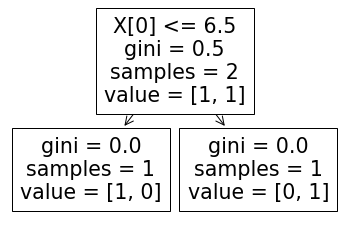

In [14]:
tree.plot_tree(clf)

### 4) Feature Importance

In [15]:
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [16]:
# 5) Iterative modeling process
### What models are appropriate
### Compare Models
### Find which performance metrics to use and adjust to make the model better.

In [17]:
### Assumptions to test in model:
#### - Combine Tests more important than physical measurments. Weigh combine tests as double.
#### - just tests, just measurments, 1:1 test/measurements, hypothesis - 2:1 test/measurment